# Deep learning steps

#### Gather the dataset

The first component of building a deep learning network is to gather our initial dataset. We need the data itself as well as the labels associated with each data point. These labels should come from a finite set of categories, such as: categories = dog, cat, panda.

#### Split Your Dataset 

Now that we have our initial dataset, we need to split it into two parts: 1. A training set 2. A testing set A training set is used by our classifier to “learn” what each category looks like by making predictions on the input data and then correct itself when predictions are wrong. After the classifier has been trained, we can evaluate the performing on a testing set. Here are some common data splits:

![data splits](images/test_train_split.png)

You should create a third data split called the validation set. This set of the data (normally) comes from the training data and is used as “fake test data” to tune the hyperparameters. Only after have we determined the hyperparameter values using the validation set do we move on to collecting final accuracy results in the testing data. We normally allocate roughly 10-20% of the training data for validation.

#### Train the network

Given our training set of images, we can now train our network. The goal here is for our network to learn how to recognize each of the categories in our labeled data. When the model makes a mistake, it learns from this mistake and improves itself.

#### Evaluate

Last, we need to evaluate our trained network. For each of the data in our testing set, we present them to the network and ask it to predict what it thinks the label of the data is. These model predictions are compared to the ground-truth labels from our testing set. The ground-truth labels represent what the data category actually is. From there, we can compute the number of predictions our classifier got correct and compute aggregate reports such as precision.

# Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

Keras allows:

1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.

# Mnist with Keras

#### Import dependencies

In [1]:
from keras import models 
from keras import layers 
from keras.utils import to_categorical 
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


#### Load and standardize the data set

In [2]:
# load the data, and separate it into train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Standardize the data

# flatten arrays
train_images = train_images.reshape((60000, 28 * 28))

# turn values from 0-255 to 0-1
train_images = train_images.astype('float32') / 255 

# same starndadization for the test images
test_images = test_images.reshape((10000, 28 * 28)) 
test_images = test_images.astype('float32') / 255

# one hot encoding
train_labels = to_categorical(train_labels) 
test_labels = to_categorical(test_labels)

#### Create and compile the model

In [3]:
# The keras.models.Sequential class is a wrapper for the neural network model that treats 
# the network as a sequence of layers
network = models.Sequential()

# Dense layers: fully connected layers
network.add(layers.Dense(64, activation='sigmoid', input_shape=(28 * 28,))) 
network.add(layers.Dense(32, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))

# Once we have our model built, we need to compile it before it can be run. 
#Compiling the Keras model calls the backend (tensorflow, theano, etc.) and binds the optimizer, 
#loss function, and other parameters required before the model can be run on any input data.

# loss function: basically, the error function. categorical crossentropy is one of many.

# optimizer: this is the mechanism through which the network will update itself.
# Stochastic Gradient descent (sgd) is one of those.

# Metrics to monitor during training and testing. Here we will only care about accuracy.
network.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


#### Train the model

The model is trained with the fit() method, through the following command that specifies the number of training epochs and the message level (how much information we want displayed on the screen during training).

In [4]:
network.fit(train_images, train_labels, epochs=50)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print("test loss: ", test_loss, "test accuracy: ", test_acc)

Epoch 1/50
60000/60000 [==============================] - 4s 62us/step - loss: 2.1970 - acc: 0.3498
Epoch 2/50
60000/60000 [==============================] - 4s 70us/step - loss: 1.7734 - acc: 0.5931
Epoch 3/50
60000/60000 [==============================] - 4s 69us/step - loss: 1.2380 - acc: 0.7125
Epoch 4/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.9057 - acc: 0.7909
Epoch 5/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.7180 - acc: 0.8303
Epoch 6/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.6032 - acc: 0.8537
Epoch 7/50
60000/60000 [==============================] - 4s 66us/step - loss: 0.5283 - acc: 0.8678
Epoch 8/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.4760 - acc: 0.8789
Epoch 9/50
60000/60000 [==============================] - 4s 67us/step - loss: 0.4382 - acc: 0.8858
Epoch 10/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.4100 - acc: 0.8914

[[0.009 0.    0.006 0.    0.038 0.014 0.926 0.    0.005 0.002]] [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


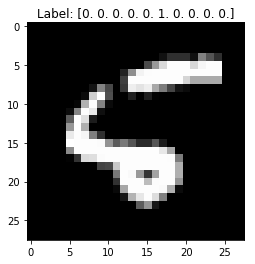

In [6]:
# make a prediction on a specific image from the test data
test_index = 8

input_image = test_images[test_index].reshape(28*28)
prediction = network.predict(np.array([input_image]))

np.set_printoptions(precision=3, suppress= True)
print(prediction, test_labels[test_index])

plt.title("Label: " + str(test_labels[test_index]))
plt.imshow(test_images[test_index].reshape(28,28), cmap="gray")